# STARCRAFT DATA ANALYSIS PROJECT

In [359]:
#import packages necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
#Import warnings
import warnings
warnings.filterwarnings("ignore")

# Having a look at the dataset...
We can see that there are columns recording the features of the participants of the games such as GameID, Age, HoursPerWeek etc and their respective ranks in the LeagueIndex

In [215]:
#loading the dataset as a dataframe 
data = pd.read_csv("starcraft_player_data.csv")
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


## Summary of the dataset

### The starcraft dataset containes 3395 records and 20 columns each representing a feature including LeagueIndex.
### From further analysis it was found that datatypes of certain features are "object" which represents a mix of numeric and string datatypes. So, let's delve deeper into understanding why those colummns have mixed values.

In [216]:
#summary of the columns in the dataset includig features such as mean, standard deviation, all four quantiles
#Why aren't Age, HoursPerWeek, TotalHours showing up in the summary tab? Investigate!!!
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [217]:
#There are in tota l 3395 player records and 19 features
data.shape

(3395, 20)

In [218]:
#Datatypes of the columns
#Certain columns such as Age, HoursPerWeek, TotalHours are of mixed datatype. But given the information for the project
#these datatypes are of type integer
data.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [23]:
#Converting Age, HoursPerWeek. TotalHours into int datatype
#Running into an error ("invalid literal for int() with base 10: '?' ") when trying to convert 'Age', 
#'HoursPerWeek' and 'TotalHours' into int
#data['Age'].astype(int)
#data['HoursPerWeek'].astype(int)
#data['TotalHours'].astype(int)

In [219]:
#Again using isreal() function, the columns Age, HoursPerWeek and TotalHours are showing up as not real
data.applymap(np.isreal)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3391,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3392,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3393,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


# Taking a closer look into the Age, TotalHours, HoursPerWeek columns 
### In analyzing the set of unique values, it was found that there is a special character '?' in all these three columns that could represent missing data for those particular instances. 
### Because of this string, no mathematical operation can be performed on these columns as they represent a mixture of values and string datatype. Hence replacing '?' to NaN values and converting these columns to numeric datatype will help us find the number of values that are missing.

In [221]:
#Unqiue values in  Age , HoursPerWeek, TotalHours column
#Can find the a character '?' in the set of unique enteries in Age , HoursPerWeek, TotalHours column
column_name = ['Age', 'HoursPerWeek', 'TotalHours']
for column in column_name:
    print(f"unique values in column: {column} is {np.sort(data[column].unique())}")
#np.sort(data["Age"].unique())

unique values in column: Age is ['16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '43' '44' '?']
unique values in column: HoursPerWeek is ['0' '10' '112' '12' '14' '140' '16' '168' '18' '2' '20' '24' '28' '30'
 '32' '36' '4' '40' '42' '48' '50' '56' '6' '60' '70' '72' '8' '80' '84'
 '90' '96' '98' '?']
unique values in column: TotalHours is ['10' '100' '1000' '10000' '1000000' '1008' '1024' '10260' '1030' '105'
 '1050' '1080' '1095' '1098' '110' '1100' '1145' '1148' '1150' '1155'
 '1163' '1170' '1196' '12' '120' '1200' '123' '125' '1250' '1256' '1260'
 '1270' '1274' '128' '130' '1300' '1320' '1344' '1350' '138' '140' '1400'
 '144' '1440' '1460' '1466' '148' '150' '1500' '153' '1560' '16' '160'
 '1600' '165' '1650' '170' '1700' '174' '175' '176' '1782' '180' '1800'
 '18000' '1825' '184' '1850' '1870' '1880' '190' '1940' '196' '20' '200'
 '2000' '20000' '2016' '208' '21' '2100' '216' '2160' '2190' '220' '22

### From further analysis it can be seen that there are 55, 56,57 missing records in Age, HoursPerWeek and TotalHours columns which consists about <2% of missing data in these columns.
### From the dendogram analysis it can be concluded that 
#### 1. distribution of columns HoursPerWeek and Age are similar to each other compared to others
#### 2. distribution of HoursPerWeek, Age, TotalHours are similar to each other than to other variables.
### Overall it looks like most of the missing data from these columns corresponds to League Index 8 and 5 . Lets dig deeper to find where the data is missing for each of these three columns

In [222]:
#Replacing '?' to NaN values in Age, HoursPerWeek, TotalHours columns in dataset and converting them into numeric datatype
#There are 55 missing values in "Age" column
#There are 56 missing values in "HoursPerWeek" column
#There are 57 missing values in "TotalHours" column

for column in column_name:
    data[column] = pd.to_numeric(data[column].replace('?', np.nan))
TotalNanCount = data.isna().sum()
Frac_of_NaNvalues = 100*(TotalNanCount/len(data))

Missing_Counts = pd.DataFrame()
Missing_Counts['TotalNanCount'] = TotalNanCount
Missing_Counts['Percent of Nan Values'] = Frac_of_NaNvalues
print(Missing_Counts)


                      TotalNanCount  Percent of Nan Values
GameID                            0               0.000000
LeagueIndex                       0               0.000000
Age                              55               1.620029
HoursPerWeek                     56               1.649485
TotalHours                       57               1.678940
APM                               0               0.000000
SelectByHotkeys                   0               0.000000
AssignToHotkeys                   0               0.000000
UniqueHotkeys                     0               0.000000
MinimapAttacks                    0               0.000000
MinimapRightClicks                0               0.000000
NumberOfPACs                      0               0.000000
GapBetweenPACs                    0               0.000000
ActionLatency                     0               0.000000
ActionsInPAC                      0               0.000000
TotalMapExplored                  0               0.0000

In [223]:
#Check if there are any missing values in any columns
#looks like there are no missing values in any columns data. The '?' is not accounte for a
data.isnull().any()

GameID                  False
LeagueIndex             False
Age                      True
HoursPerWeek             True
TotalHours               True
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

<AxesSubplot:>

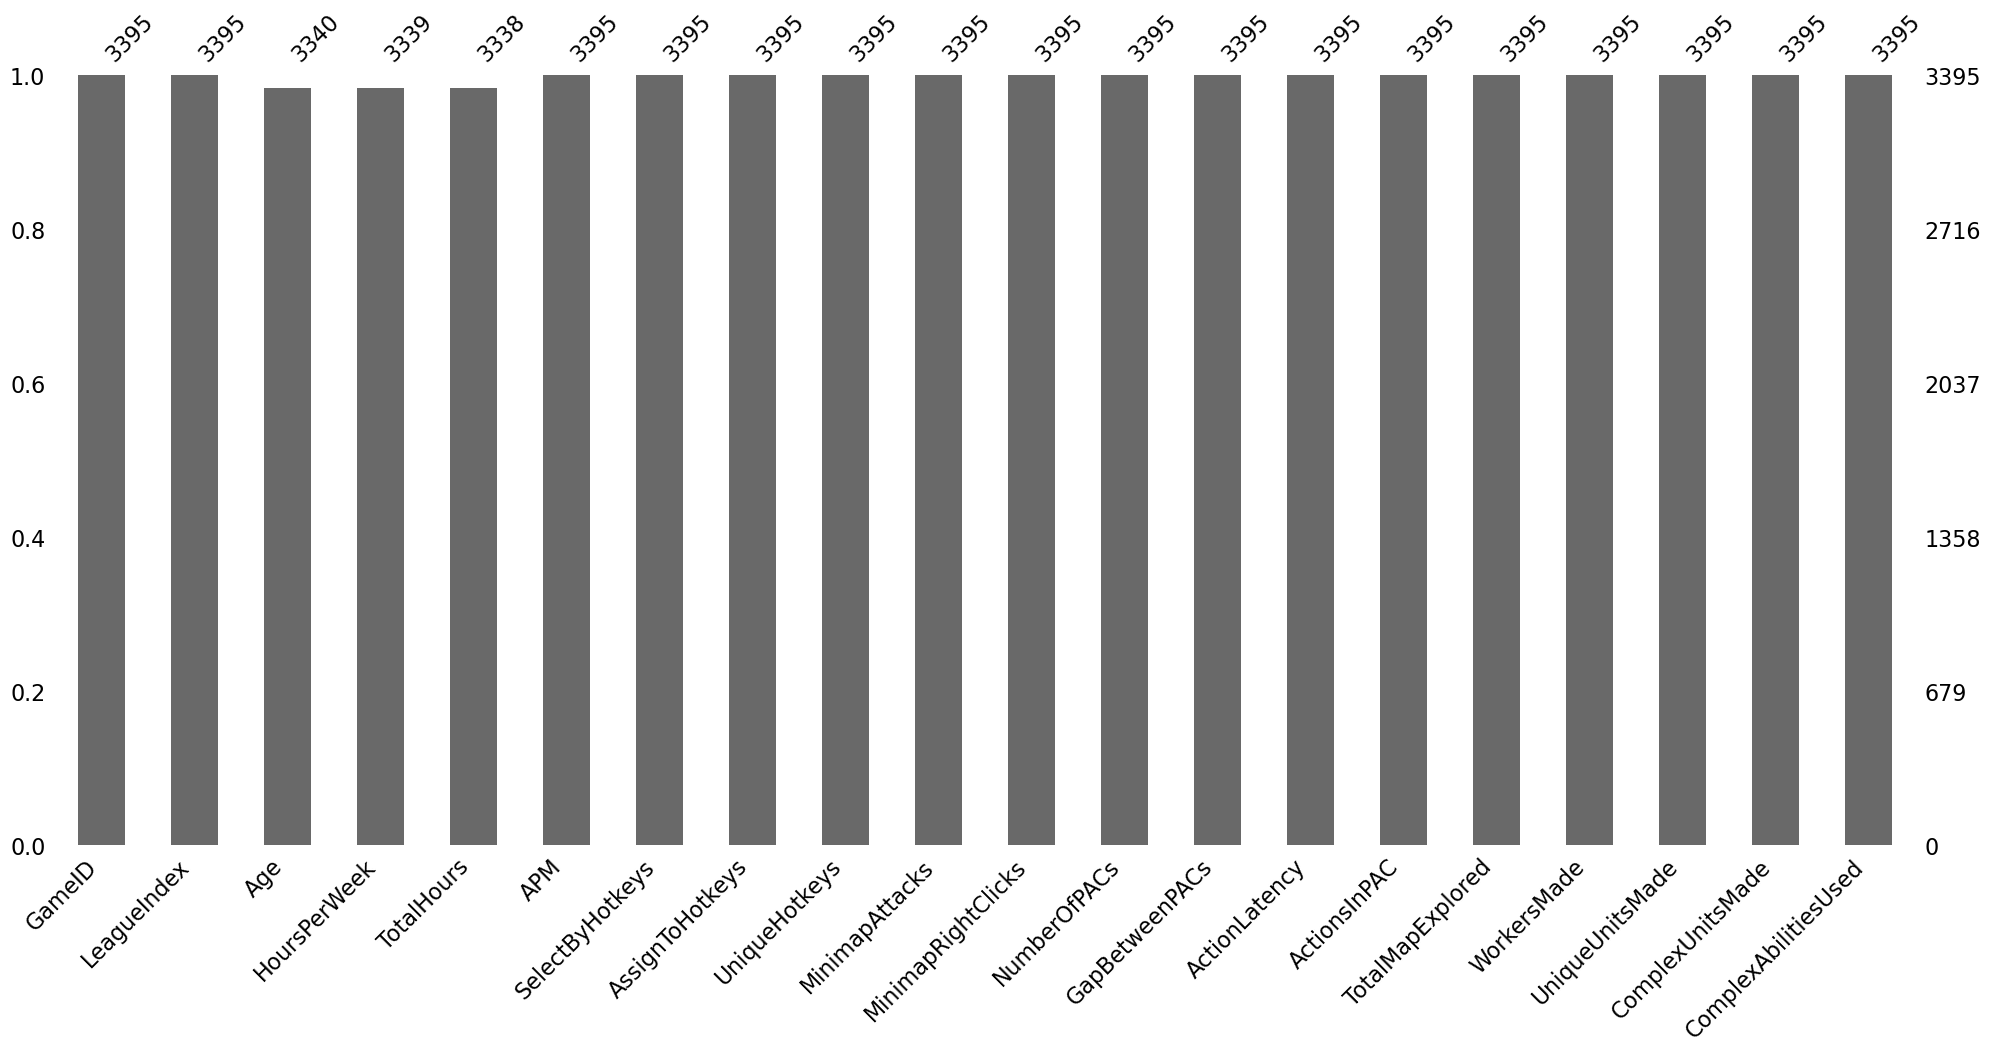

In [224]:
#Plot to show the missing values
msno.bar(data)

<AxesSubplot:>

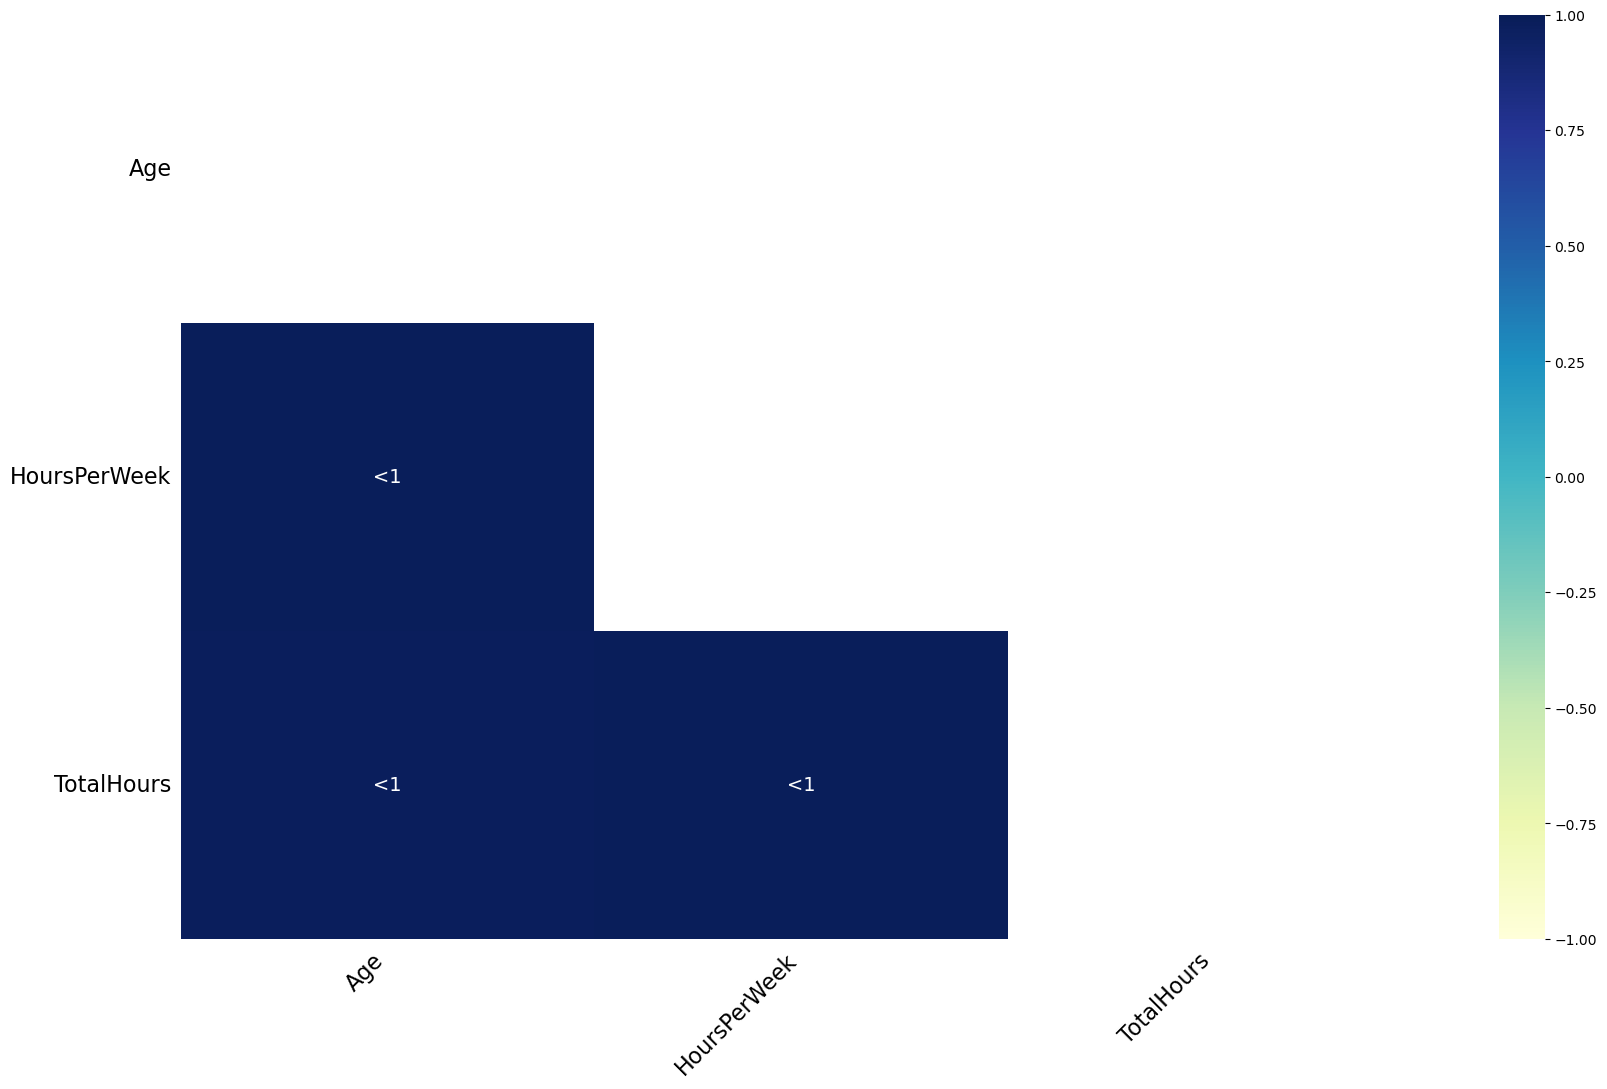

In [225]:
msno.heatmap(data, cmap='YlGnBu')

<AxesSubplot:>

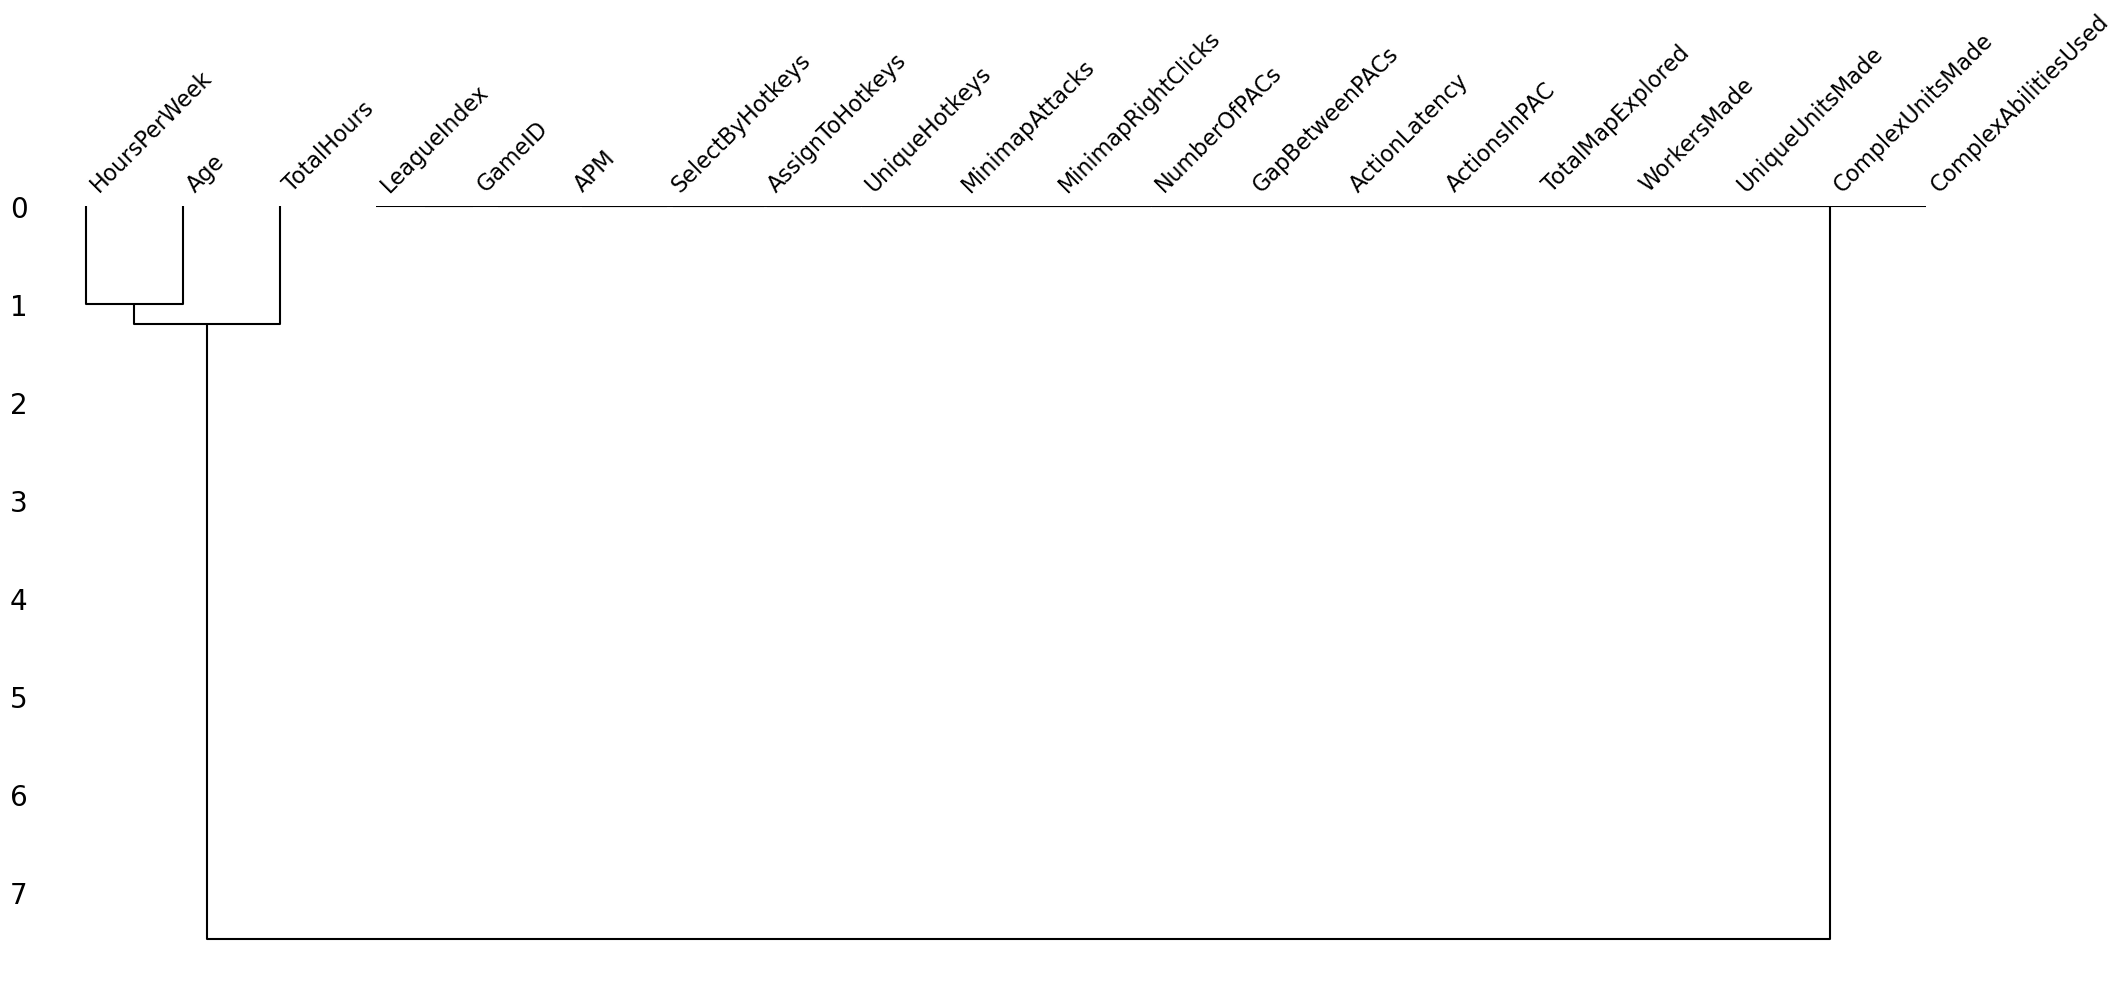

In [226]:
#distribution of columns HoursPerWeek and Age are similar to each other compared to others
#distribution of HoursPerWeek, Age, TotalHours are similar to each other than to other variables.
msno.dendrogram(data)

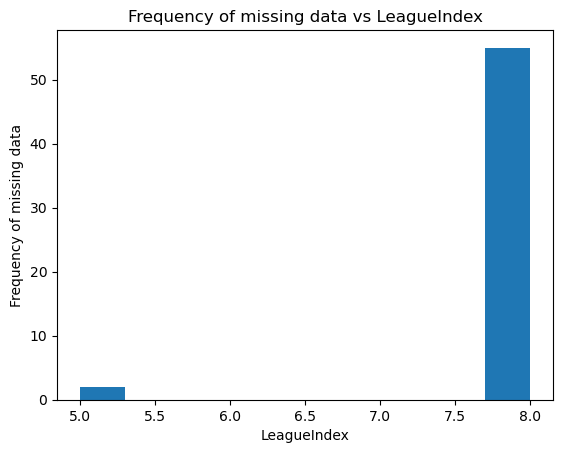

In [227]:
#Visualizing where the data is missing in the entire dataset
#Looks like most of the missing data corresponds to League Index 8 and 5 
missing_data = data[data.isna().any(axis=1)]
plt.hist(missing_data['LeagueIndex'])
plt.xlabel('LeagueIndex')
plt.ylabel('Frequency of missing data')
plt.title('Frequency of missing data vs LeagueIndex')
plt.show()

### Most of the data is missing in Age column corresponds to LeagureIndex 8  
### Most of the data that is missing in HoursPerWeek and TotalHours corresponds to League Index 8 and 5

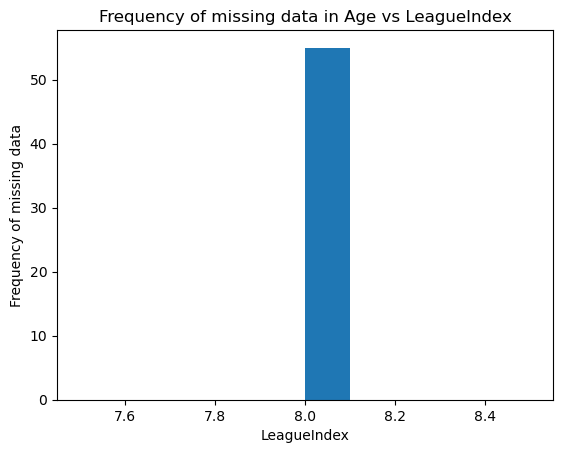

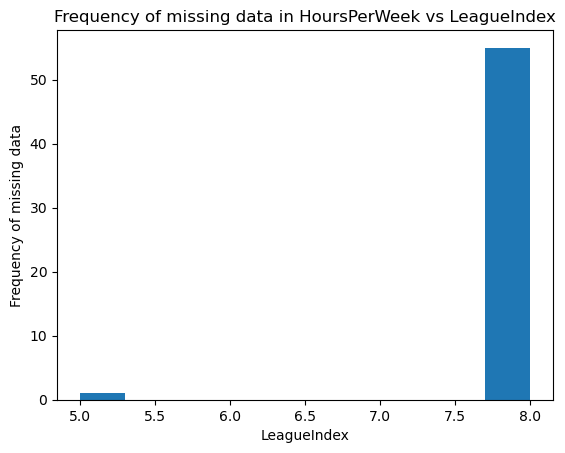

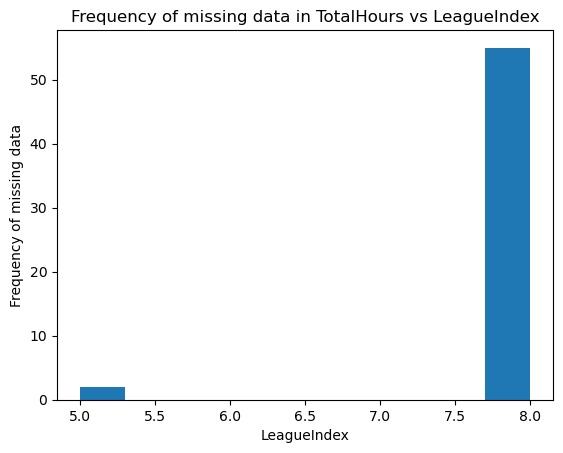

In [228]:
#Now find the distribution of where the data is missing for each column
#Most of the data is missing in Age column corresponds to LeagureIndex 8 
#Most of the data that is missing in HoursPerWeek and TotalHours corresponds to League Index 8 and 5

for column in column_name:
    missing_data = data[data[column].isna()]
    plt.hist(missing_data['LeagueIndex'],label = column )
    plt.xlabel('LeagueIndex')
    plt.ylabel('Frequency of missing data')
    plt.title(f'Frequency of missing data in {column} vs LeagueIndex')
    plt.show()

### Conclusion from the boxplot analyis
### 1. There seems to be an oultlier in LeagueIndex 5 for the totalhours columns and it will have to be removed
### 2. The distribution of Age in LeagueIndex 6, 7 are very close, so we can use the mean of from these two categories to replace missing age data in LeagueIndex 8
### 3. Similarly the distribution of HoursPerweek in LeagueIndex 6, 7 are very close, so we can use the mean of from these two categories to replace missing HoursPerWeek data in LeagueIndex 8

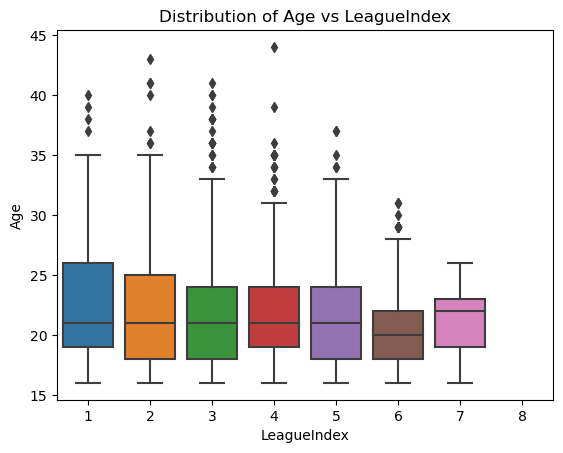

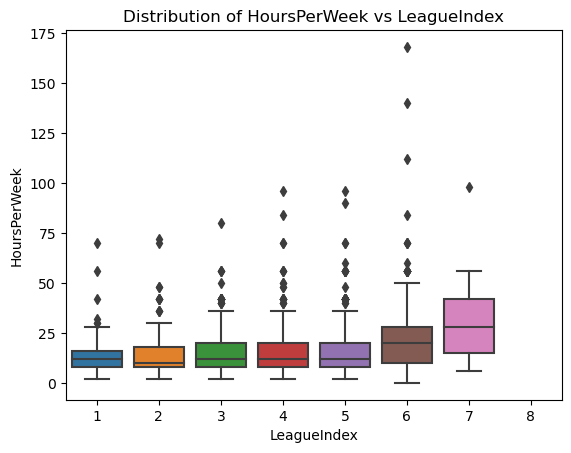

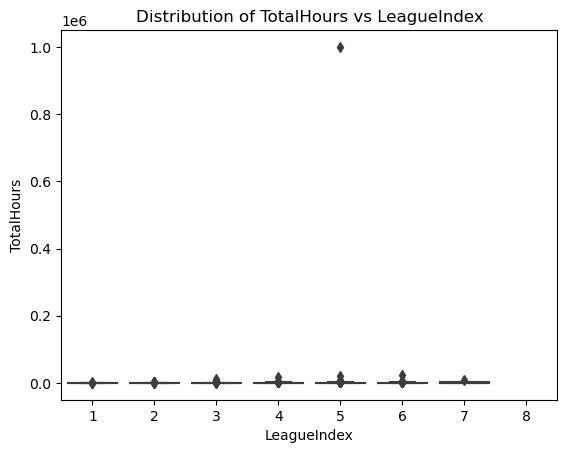

In [229]:
#Get the distribution of Age, HoursPerWeek, TotalHours column corresponding to LeagueIndex
#Outlier in leagueIndex 5 (extreme value)

for column in column_name:
    plt.figure()
    sns.boxplot(data = data, y = column, x = 'LeagueIndex')
    plt.title(f"Distribution of {column} vs LeagueIndex")
    plt.show()

In [230]:
#Replacing the missing value in age column
League6_7_data = data.loc[(data['LeagueIndex'] == 6) | (data['LeagueIndex'] == 7)] 
mean_age = League6_7_data['Age'].mean()
#replaceing Nan values in league 8 with this mean value
data['Age'].fillna(value = mean_age, inplace = True)
#checking if all Nan Vallues have been replaced or not
print(data['Age'].isna().sum())

0


In [232]:
#Replacing the missing value in hoursperweek column
mean_hours = League6_7_data['HoursPerWeek'].mean()
#replaceing Nan values in league 8 with this mean value
data.loc[(data['LeagueIndex'] == 8) & (data['HoursPerWeek'].isna()),'HoursPerWeek'] = mean_hours
#checking if all Nan Vallues have been replaced or not. There is one value that is missing at LeagueIndex 5 in 
#HoursPerWeek Column
print(data['HoursPerWeek'].isna().sum())

#replace the missing data in league index with the median of HoursPerWeek in league index 5
median_value = data.loc[(data['LeagueIndex'] == 5) & (data['HoursPerWeek'].notna())]['HoursPerWeek'].median()
data.loc[(data['LeagueIndex'] == 5) & (data['HoursPerWeek'].isna()),'HoursPerWeek'] = median_value
#checking if all Nan Vallues have been replaced or not
print(data['HoursPerWeek'].isna().sum())

0
0


3
0


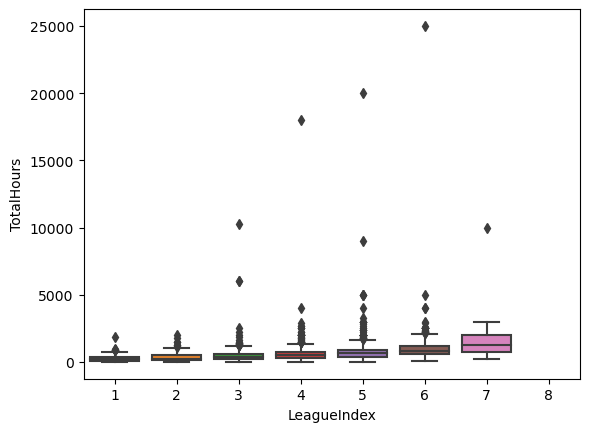

In [233]:
#remove the outlier in leagueIndex 5 in the totalhours column and replace it with nan
data.loc[(data['LeagueIndex'] == 5) & (data['TotalHours'] > 0.8*(10**6)),'TotalHours'] = np.nan
#now visulaize the data again
sns.boxplot(data = data, y = 'TotalHours', x = 'LeagueIndex')
#Huge differences in median value between leagueindex 6 and 7. so replace nan values in leagueindex 8 
#with median values of 7. median of league 6 is 800 and 7 is 1250
median_value = data.loc[(data['LeagueIndex'] == 7)]['TotalHours'].median()
data.loc[(data['LeagueIndex'] == 8) & (data['TotalHours'].isna()),'TotalHours'] = median_value
#checking if all Nan Vallues have been replaced or not
print(data['TotalHours'].isna().sum())

#replacing all nan values in league index 5 with median of totalhours in league index 5
median_value = data.loc[(data['LeagueIndex'] == 5)]['TotalHours'].median()
data.loc[(data['LeagueIndex'] == 5) & (data['TotalHours'].isna()),'TotalHours'] = median_value
#checking if all Nan Vallues have been replaced or not
print(data['TotalHours'].isna().sum())

In [234]:
#Final check if there are any missing values. Hurray!! all missing data has been addressed
data.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

## Understanding the correlation between features and outcome

### Important features affecting LeagueIndex:
#### 1. APM (Positive correlation)
#### 2. SelectByHotKeys(Positive correlation)
#### 3. AssignToHotKeys(Positive correlation)
#### 4. NumberOfPACS (Positive correlation)
#### 5. GapBetweenPACS (Negative correlation)
#### 6. ActionLatency (Negative correlation)
All other features seems to not affect LeagueIndex to a great extent. 

However there is positive correlation between GapBetweenPACs and ActionLatency
negative correlation between APM and Action Latency and NumberofPACS. 
Hence it can be seen that multicollinearity exists in the features of this dataset that would need to be analyzed further.

<AxesSubplot:>

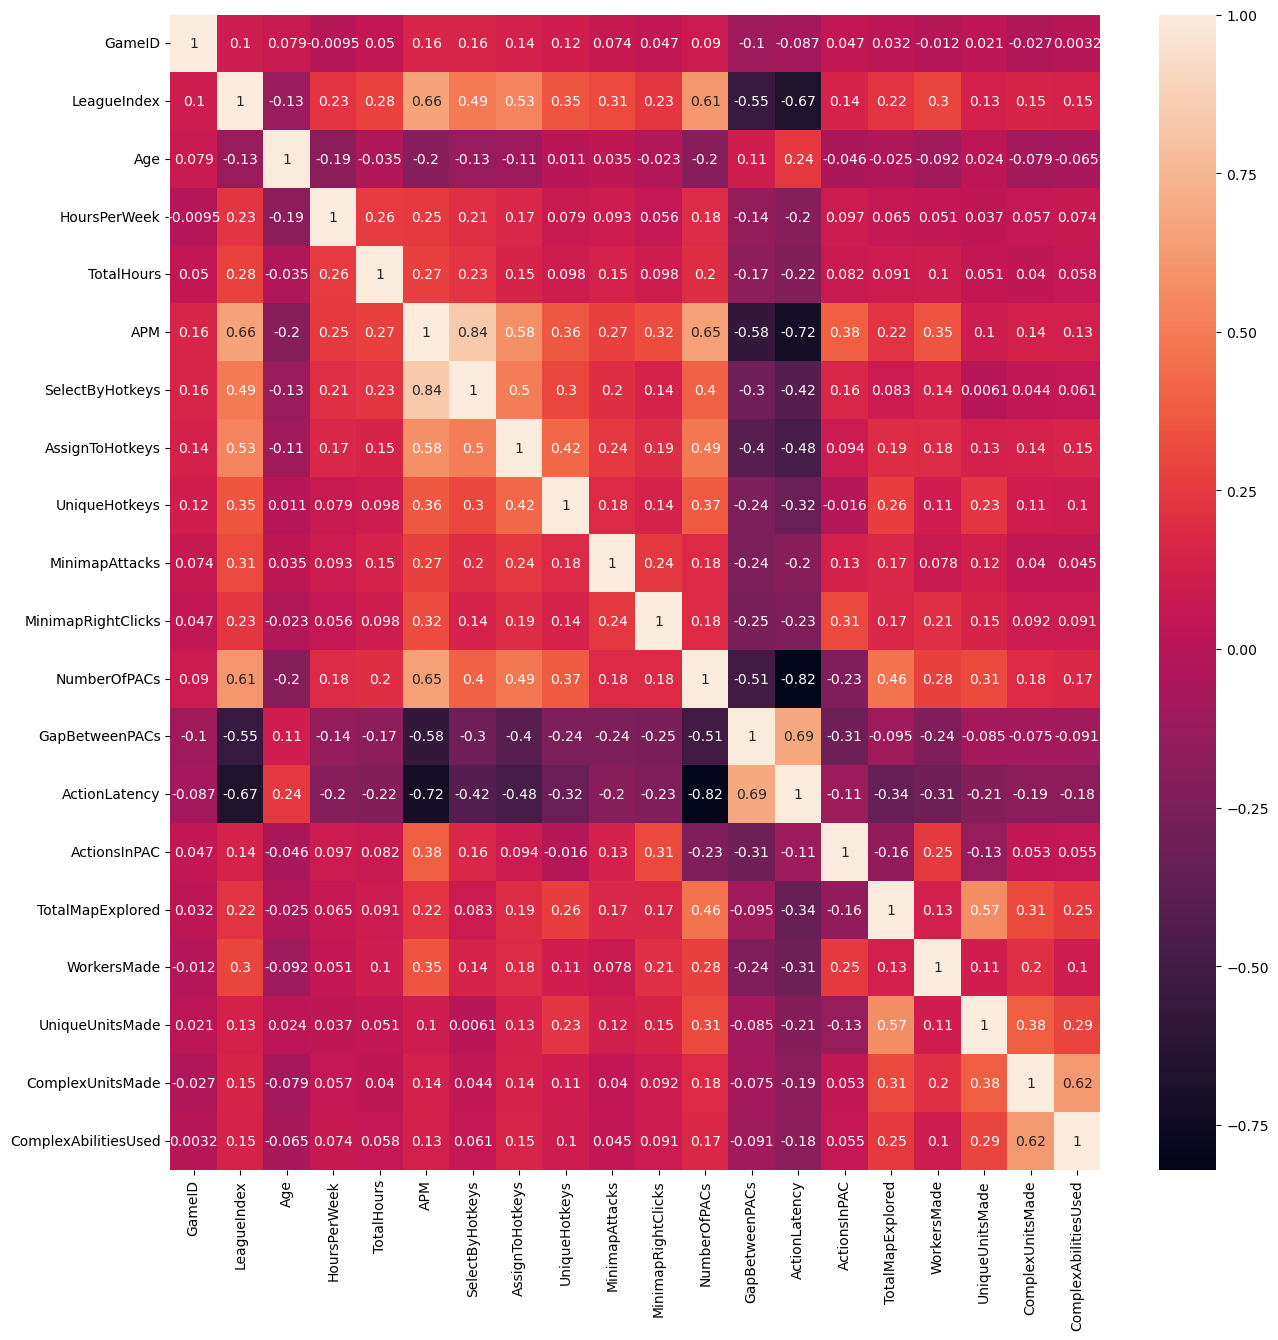

In [235]:
#Visualizing the correlation pot
corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)

### From the VIF scores of features that were highly correlated with LeagueIndex it can been that
1. APM and NumberOfPACS are highly correlated
2. GapBetweenPACs and ActionLatency
3. SelectByHotKeys and AssignToHotKeysAPM
We can try to remove some these features and check if the VIF scores have been reduced.

In [240]:
#Using VIF scores to quantify the multicollinearity
#APM and NumberOfPACS are highly correlated
#So are GapBetweenPACs and ActionLatency
#and SelectByHotKeys and AssignToHotKeys

feature_name = ['APM','SelectByHotkeys', 'AssignToHotkeys','NumberOfPACs','GapBetweenPACs','ActionLatency']
X = data[feature_name]
#VIF Dataframe 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
#VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,APM,36.590148
1,SelectByHotkeys,6.560665
2,AssignToHotkeys,5.967856
3,NumberOfPACs,24.914253
4,GapBetweenPACs,13.882343
5,ActionLatency,15.915836


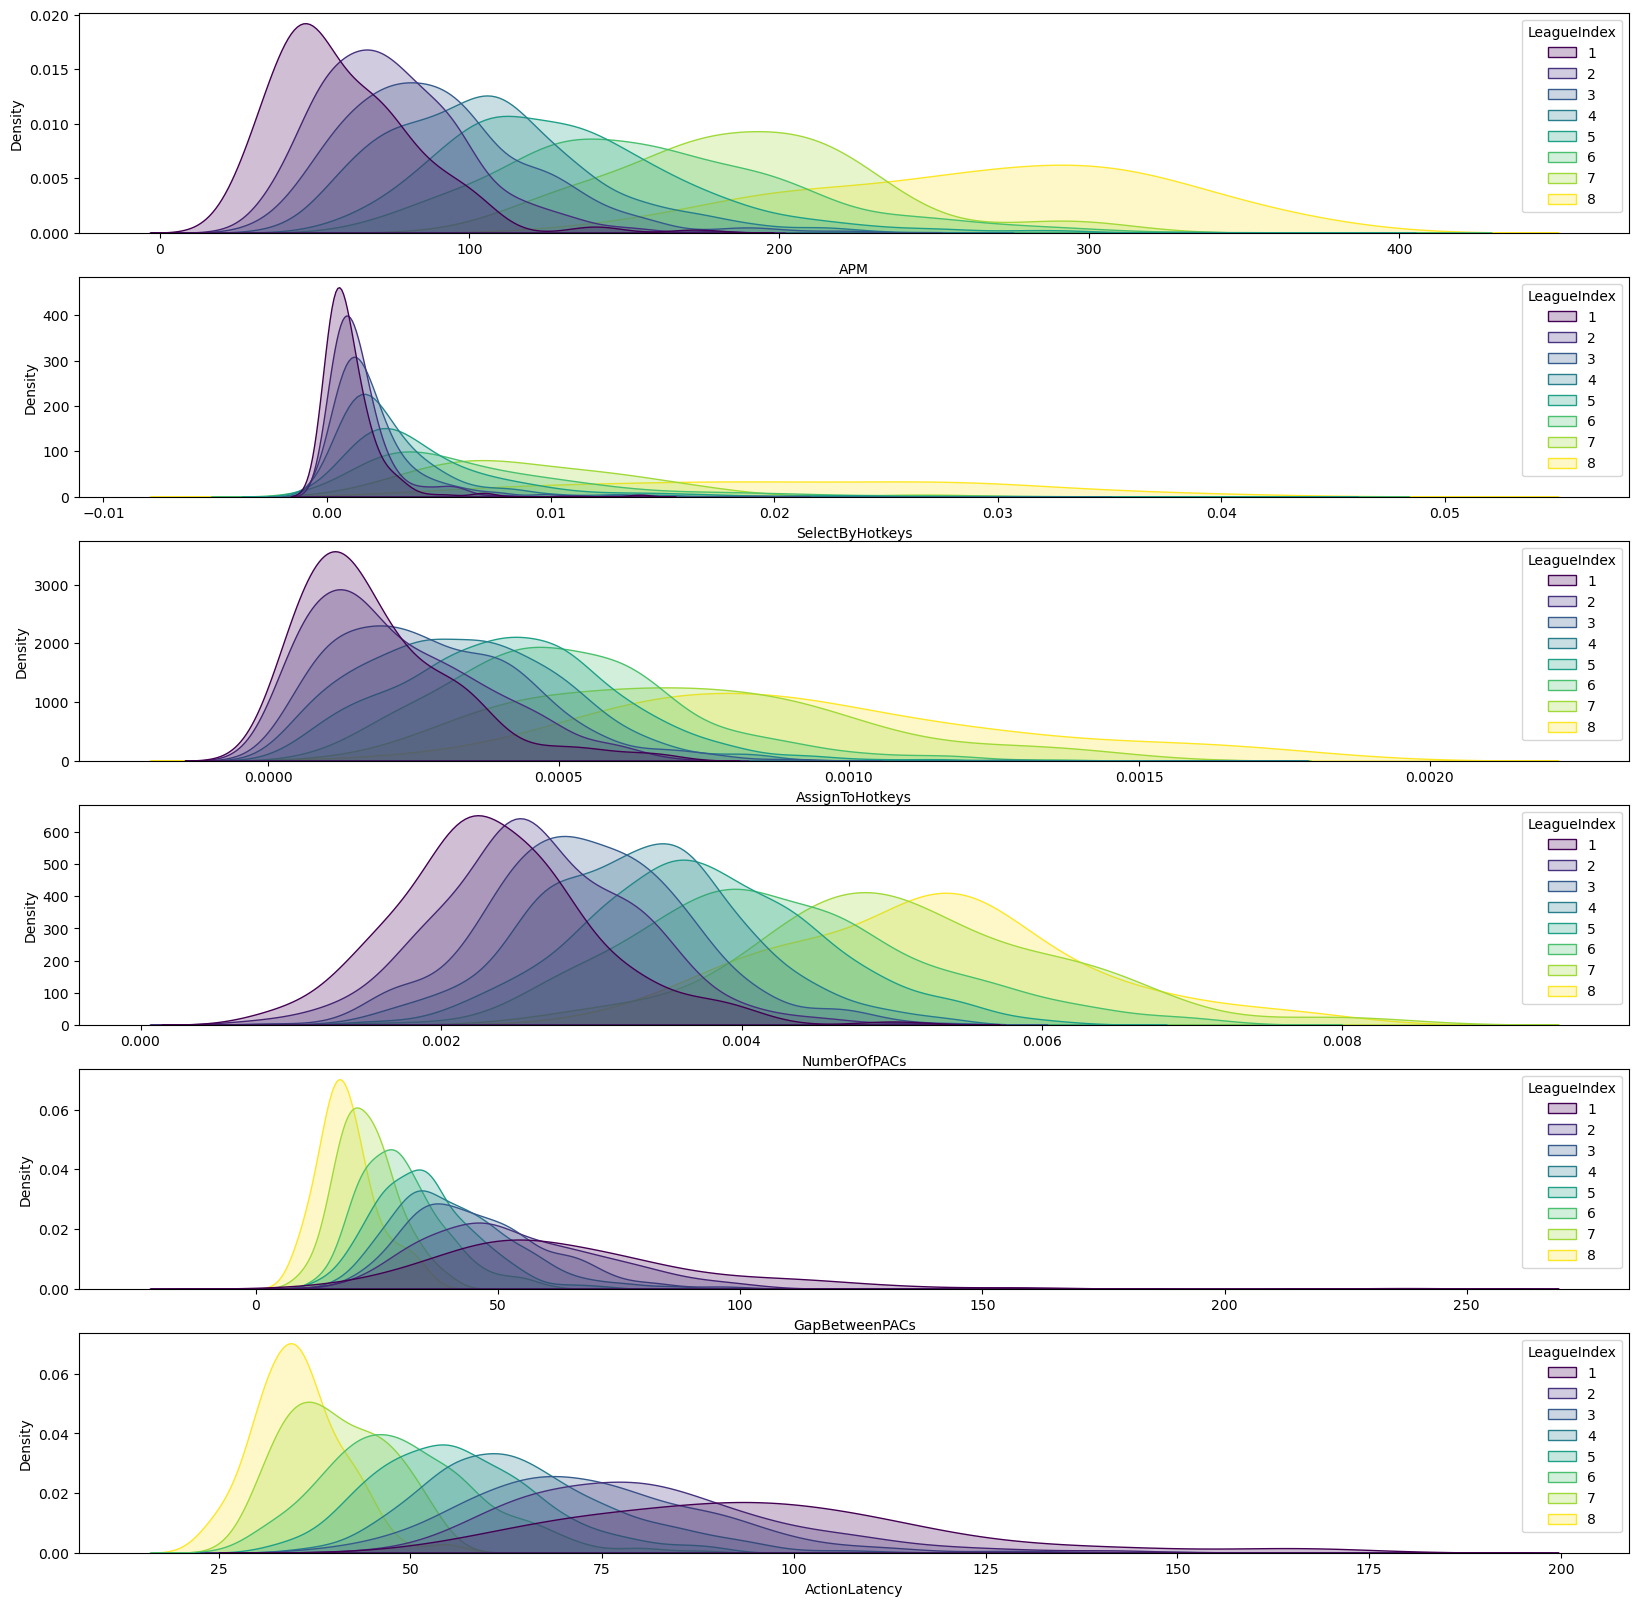

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [241]:
#Visualzing the distribution of all highly correlated features with LeagueIndex
feature_name = ['APM','SelectByHotkeys', 'AssignToHotkeys','NumberOfPACs','GapBetweenPACs','ActionLatency']
fig, axes = plt.subplots(6,1, figsize = (20,20))
i = 0
for feature in feature_name:
    plt.figure()
    sns.kdeplot(ax = axes[i], data = data, x = feature, hue = 'LeagueIndex', common_norm = False, palette="viridis", fill = True)
    i+=1
plt.show()
    

### Selecting only 'APM' and 'ActionLatency' brings down VIF score.  We can include 'MinimapAttacks', 'HoursPerWeek', 'TotalHours','MinimapRightClicks' as it does not increase the VIF score significantly. So we can include them in the model to improve accuracy of predictions

In [251]:
#Selecting only 'APM' and 'ActionLatency' brings down VIF score. Including MinimapAttacks', 'HoursPerWeek', 'TotalHours','MinimapRightClicks'
#does not increase the VIF score significantly. So we can include them in the model to improve accuracy of predictions
feature_name = ['APM', 'ActionLatency','MinimapAttacks', 'HoursPerWeek', 'TotalHours','MinimapRightClicks']
X = data[feature_name]
#VIF Dataframe 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
#VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,APM,5.141961
1,ActionLatency,2.954527
2,MinimapAttacks,1.511314
3,HoursPerWeek,3.089172
4,TotalHours,1.834675
5,MinimapRightClicks,2.361074


### From the boxplot it can been that APM has a positive correlation on League Index meaning at higher leagueindex the APM is also high.
### While Action Latency has a negative correaltion on League Index meaning at higher leagueindex the Action Latency  is low. 
### MinimapAttacks and MinimapRightClicks are also positively correlated with League Index

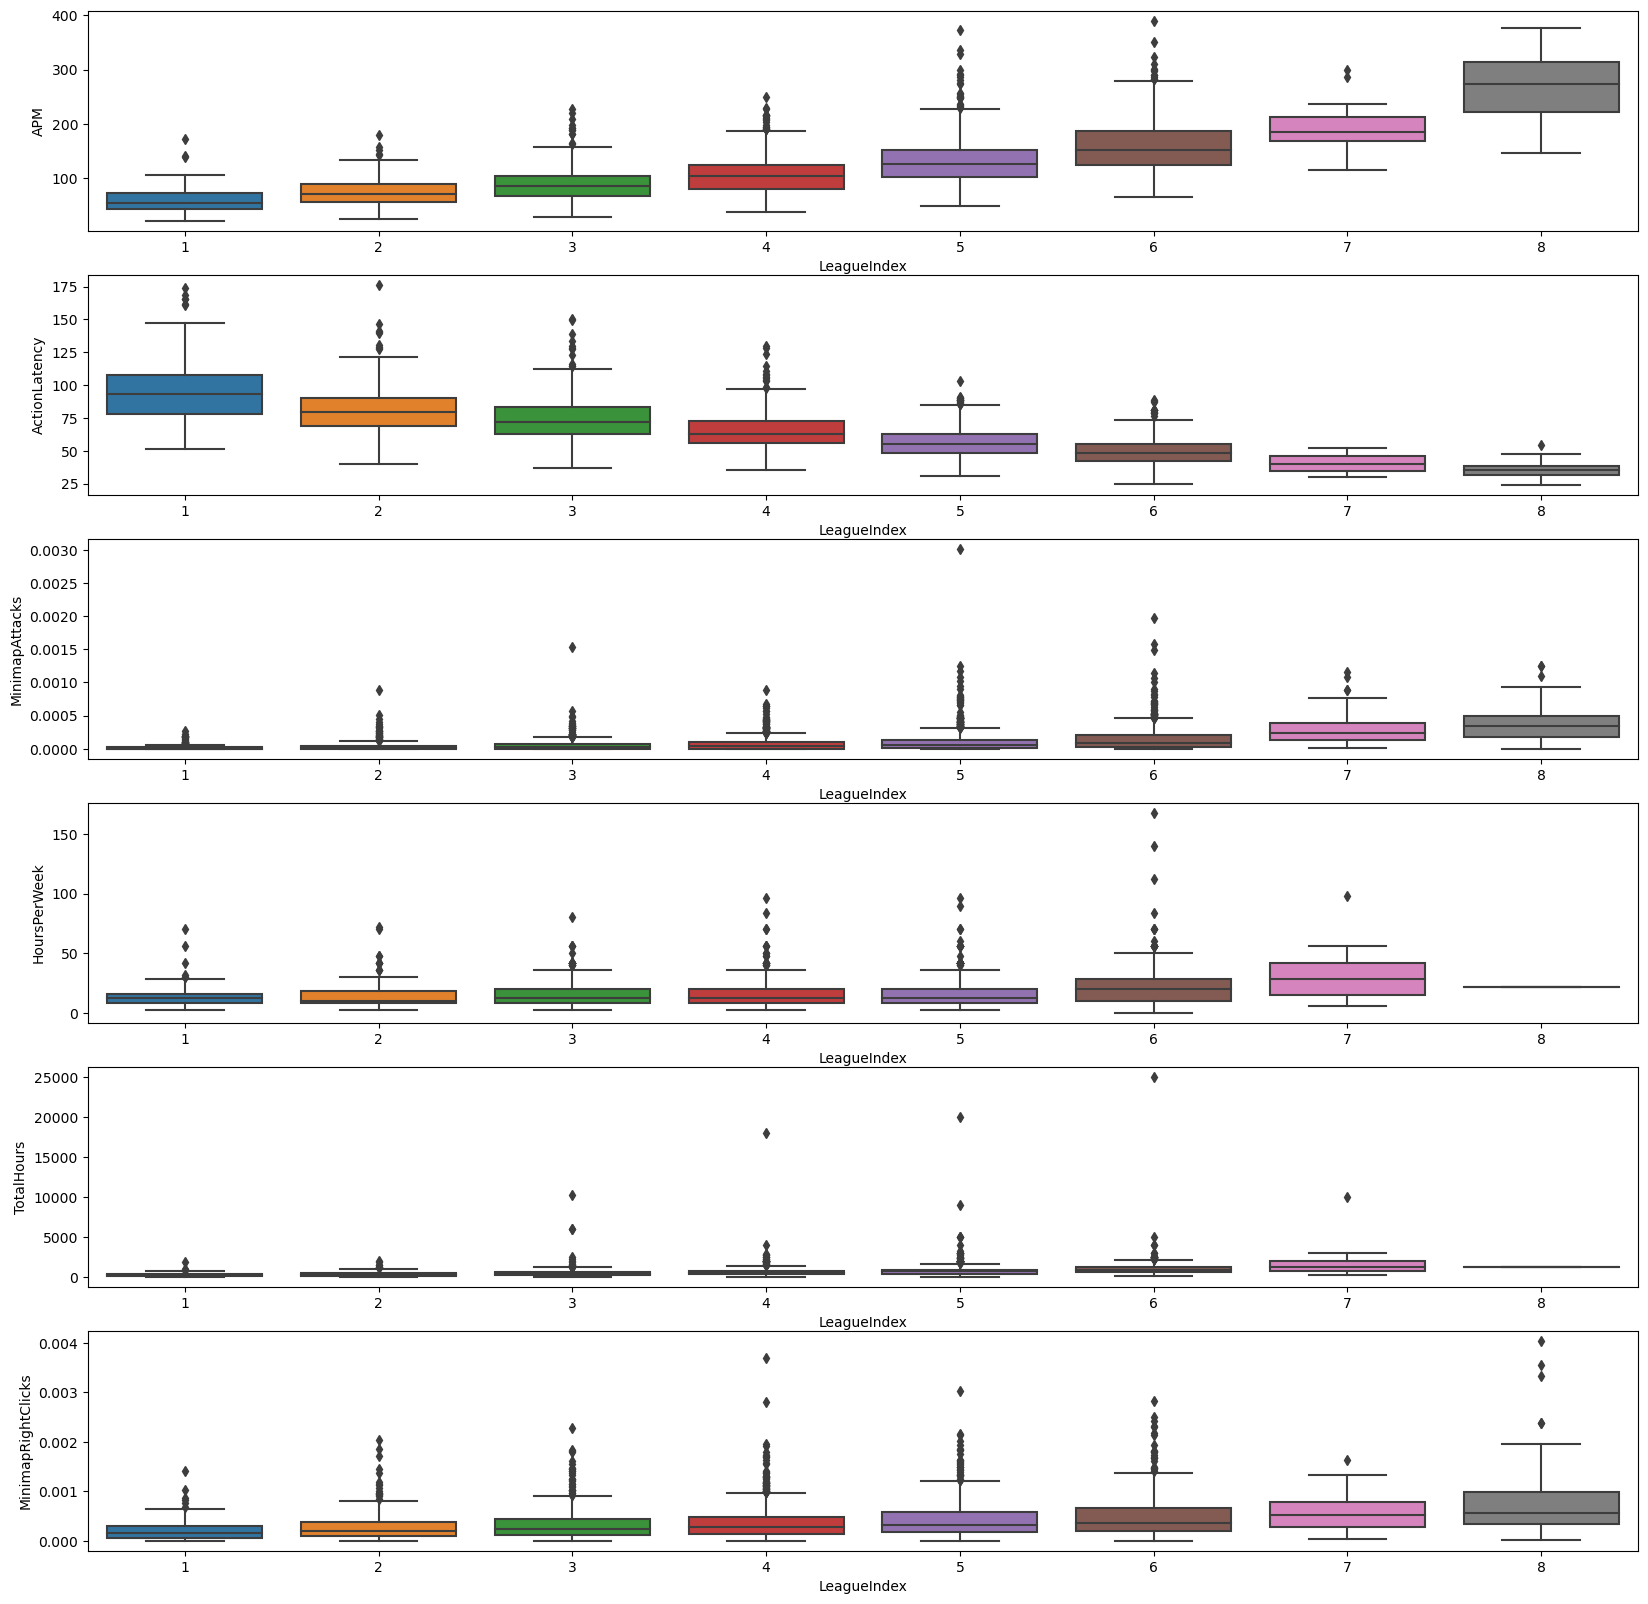

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [252]:
#Looking at the individual boxplot of these features to see if there are any outliers
#1. In APM vs leagueindex positve correlation
#2. In 

fig, axes = plt.subplots(6,1, figsize = (20,20))
i = 0
for feature in feature_name:
    plt.figure()
    sns.boxplot(ax = axes[i],data = data, y = feature, x = 'LeagueIndex')
    i+=1
plt.show()

In [329]:
#Drop all the features that are not necessary for prediction of performance
X = data[feature_name]
y = data['LeagueIndex']
newdata = pd.concat([X,y], axis = 1)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)


<AxesSubplot:xlabel='LeagueIndex'>

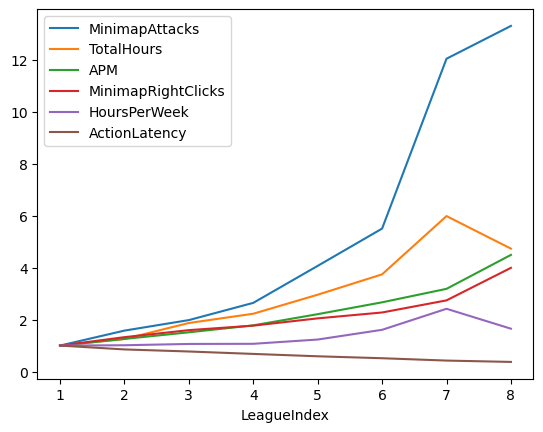

In [279]:
Average_features = (newdata.groupby(['LeagueIndex']).mean()/newdata.groupby(['LeagueIndex']).mean().iloc[0]).sort_values(by=7, axis=1, ascending=False)
Average_features.plot()

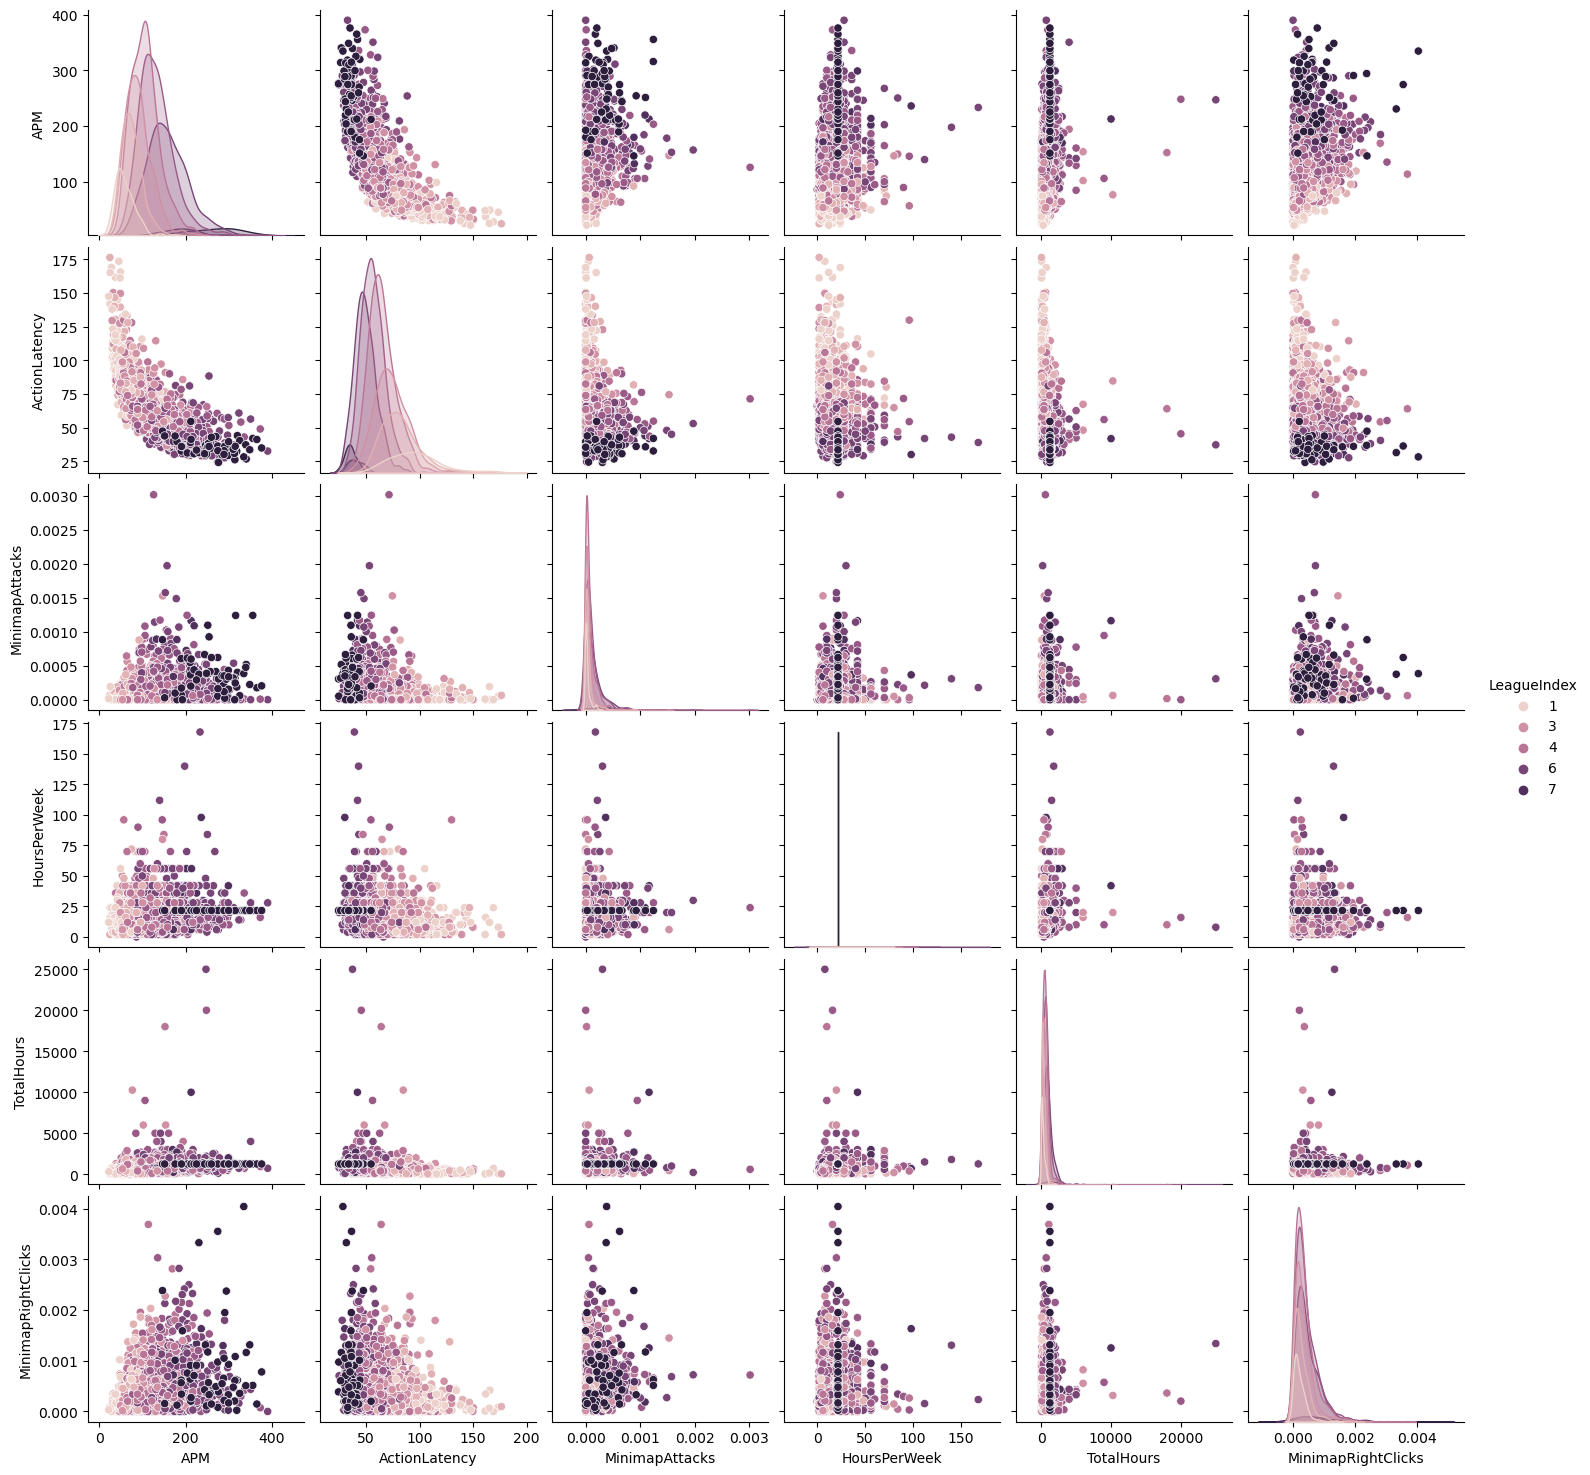

In [280]:
sns.pairplot(newdata, hue = 'LeagueIndex')

## Modelling 
### As it's a classification problem, I'm using a randomforest classifier to fit the data with only the important features such as 'APM', 'ActionLatency','MinimapAttacks', 'HoursPerWeek', 'TotalHours','MinimapRightClicks' to predict the LeagueIndex class.
### Model accuracy is chosen as the metric of model performance
### Train and test split is chosen to be 80:20 
### For the baseline performance, an accuracy of 37% is achieved using 1000 trees.


In [353]:
#Split the data into train and test
X = data.drop(columns = 'LeagueIndex')
y = data['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)

In [360]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [335]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is {accuracy}")


Accuracy of the model is 0.374079528718704


In [369]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [366]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1135; total time=   7.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=150, max_features=sqrt, n_estimators=1964; total time=  24.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1135; total time=   7.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=150, max_features=sqrt, n_estimators=1964; total time=  24.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1135; total time=   7.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=150, max_features=sqrt, n_estimators=1964; total time=  26.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1135; total time=   7.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1135; total time=   6.9s
[CV] END boots

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [367]:
print (rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

1.0
0.23269513991163476


# RESULTS
Using a random forest classifier model an accuracy of 41% was achieved on the test set. Some of the important factors that dictate the LeagueIndex are APM', 'ActionLatency','MinimapAttacks', 'HoursPerWeek', 'TotalHours','MinimapRightClicks'. In general individuals with high APM and low ActionLatency will achieve higher leagureIndex. 
